# Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define FNN

## Feed-Forward Neural Network Algorithm

In [ ]:
class FeedForwardNeuralNetwork:
    def __init__(self, num_features, num_hidden_neurons, num_output_neurons):
        self.num_features = num_features
        self.num_hidden_neurons = num_hidden_neurons
        self.num_output_neurons = num_output_neurons
        self.hidden_weights, self.hidden_bias, self.output_weights, self.output_bias = self.initialize_weights()

    def initialize_weights(self):
        # Hidden Unit Weight & Bias Initialization
        hidden_weights = np.random.randn(self.num_features, self.num_hidden_neurons)
        hidden_bias = np.random.randn(1, self.num_hidden_neurons)

        # Output Layer Weight & Bias Initialization
        output_weights = np.random.randn(self.num_hidden_neurons, self.num_output_neurons)
        output_bias = np.random.randn(1, self.num_output_neurons)

        return hidden_weights, hidden_bias, output_weights, output_bias

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def rmse(y_true, y_pred):
        squared_error = np.square(np.subtract(y_true, y_pred))
        mean_squared_error = np.mean(squared_error)
        rmse = np.sqrt(mean_squared_error)
        return rmse

    @staticmethod
    def mse(y_true, y_pred):
        squared_error = np.square(np.subtract(y_true, y_pred))
        mean_squared_error = np.mean(squared_error)
        return mean_squared_error

    @staticmethod
    def mae(y_true, y_pred):
        absolute_error = np.abs(np.subtract(y_true, y_pred))
        mean_absolute_error = np.mean(absolute_error)
        return mean_absolute_error

    def forward_pass(self, input_data, activation_function, loss_function):
        # Check if dimensions are compatible
        if input_data.shape[1] != self.hidden_weights.shape[0] or self.hidden_weights.shape[1] != self.output_weights.shape[0]:
            raise ValueError("Input data and weight dimensions are not compatible.")

        # Compute the input to the hidden layer
        hidden_input = np.dot(input_data, self.hidden_weights) + self.hidden_bias

        # Apply the activation function to the hidden layer
        hidden_output = activation_function(hidden_input)

        # Compute the input to the output layer
        output_input = np.dot(hidden_output, self.output_weights) + self.output_bias

        # Calculate the error using the provided loss function
        error = loss_function(input_data, output_input)

        # Return both error and predicted outputs
        return error, output_input

## Backpropagation Algorithm

# Build FNN

## Initialize Forward-Pass

In [ ]:
tf.random.set_seed(42)

# 1000x10 dummy data
num_samples = 1000
num_features = 3
input_data = np.random.rand(num_samples, num_features)
num_hidden_neurons = 100
num_output_neurons = 1

fnn = FeedForwardNeuralNetwork(num_features, num_hidden_neurons, num_output_neurons)
activation_function = fnn.tanh  # You can choose the activation function
loss_function = fnn.rmse  # You can choose the loss function


error, output = fnn.forward_pass(input_data, activation_function, loss_function)

print("Forward Pass Output:")
print("RMSE Score:", error)


Forward Pass Output:
RMSE Score: 3.349389084235426


## First training results

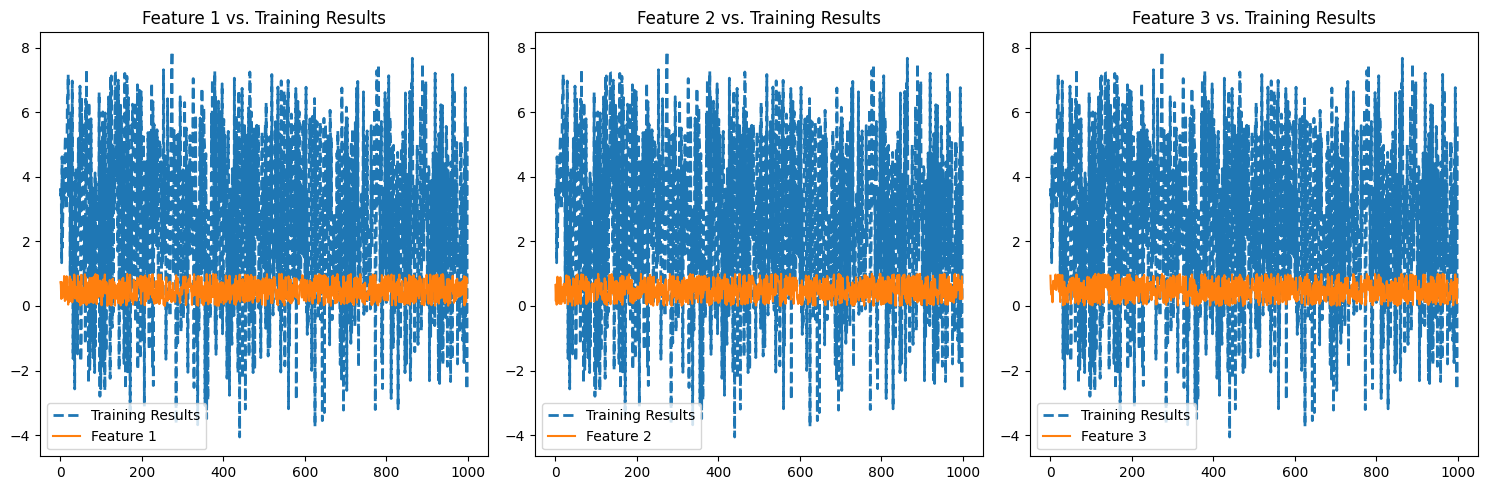

In [ ]:
fig, axes = plt.subplots(1, num_features, figsize=(15, 5))

for i in range(num_features):
    ax = axes[i]
    ax.plot(output, label="Training Results", linestyle='--', linewidth=2)
    ax.plot(input_data[:, i], label=f"Feature {i + 1}")
    ax.set_title(f"Feature {i + 1} vs. Training Results")
    ax.legend(loc="best")

plt.tight_layout()
plt.show()